# TALLER 5 JULIAN PENA 

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [300]:
df_col= pd.read_csv("ColombiaCB.csv")
df_col["Country"] = "Colombia"
df_col= pd.read_csv("ColombiaCB.csv")
df_col["Country"] = "Colombia"
df_chi= pd.read_csv("ChileCB.csv")
df_chi["Country"] = "Chile"
df_bra= pd.read_csv("BrazilCB.csv")
df_bra["Country"] = "Brazil"
df_arg= pd.read_csv("ArgentinaCB.csv")
df_arg["Country"] = "Argentina"
df_mex= pd.read_csv("MexicoCB.csv")
df_mex["Country"] = "Mexico"
df_uru= pd.read_csv("UruguayCB.csv")
df_uru["Country"] = "Uruguay"

df_esp= pd.read_csv("SpainCB.csv")
df_esp["Country"] = "Spain"
df_sui= pd.read_csv("SwitzerlandCB.csv")
df_sui["Country"] = "Switzerland"
df_isr= pd.read_csv("IsraelCB.csv")
df_isr["Country"] = "Israel"
df_usa= pd.read_csv("UsaCB.csv")
df_usa["Country"] = "Usa"
df_all = pd.concat([df_col,df_chi,df_bra,df_arg, df_mex,df_uru, df_esp,df_sui, df_isr , df_usa] )
df_all = df_all.drop(["Organization Name URL"], axis=1)
df_all["Founded Date"] = pd.to_datetime(df_all["Founded Date"])
df_all["Exit Date"] = pd.to_datetime(df_all["Exit Date"])
df_all["Closed Date"] = pd.to_datetime(df_all["Closed Date"])
df_all["Last Funding Date"] = pd.to_datetime(df_all["Last Funding Date"])
df_all["Delisted Date"] = pd.to_datetime(df_all["Delisted Date"])
df_all["IPO Date"] = pd.to_datetime(df_all["IPO Date"])
df_startup = pd.read_excel("100startupcol.xlsx", index_col= 0)
df_startup =df_startup.rename(columns = {"1Doc3":"Startup"})
df_col_top_100 = pd.merge(df_col, df_startup, left_on="Organization Name", right_on= "Startup"  )
df_col_top_100 = df_col_top_100["Organization Name"].astype(str) 


startup_contained = []
startup_not_contained = []

df_colombia_company = df_all[ df_all['Country'] == 'Colombia' ]
list_colombia_company_names = df_colombia_company['Organization Name'].tolist()

for i in range(100):
    top_company_name = df_startup.iloc[i].Startup
    if top_company_name.upper() in (top_company_name.upper() for top_company_name in list_colombia_company_names):
        startup_contained.append(top_company_name)
    else:
        startup_not_contained.append(top_company_name)

print("[%d] estan contenidas, [%d] no estan contenidas"%(len(startup_contained),len(startup_not_contained)))

df_colombia_company["isInTop100"] = 0

pass

for company_name in startup_contained:
    df_colombia_company.loc[df_colombia_company['Organization Name'] == company_name, ['isInTop100']] = 1
    
df_col_top100= df_colombia_company
df_contactos = pd.read_excel("EUContactos.xlsx")
    
df_col_merge_1_bases = pd.merge(df_col_top100, df_contactos, left_on="Organization Name", right_on= "Name"  )


df_col_merge_2_bases = pd.merge(df_col, df_contactos, left_on="Organization Name", right_on= "Name"  )


df_col_merge_0_bases = pd.merge(df_col, df_startup, left_on="Organization Name", right_on= "Startup"  )


df_col_merge_3_bases = pd.merge(df_col_merge_2_bases, df_col_merge_0_bases, left_on="Organization Name", right_on= "Organization Name"  )


def Cotejar(data, values):
    if data in values:
        return 1
    else:
        return 0
    
df_col['cotejar_Or'] = df_col['Organization Name'].apply(Cotejar, values=df_contactos['Name'].tolist())

df_col['cotejar_1'] = df_col_top100["isInTop100"]
df_col['cotejar_all3'] = df_col['cotejar_1'].apply(Cotejar, values=df_col['cotejar_Or'].tolist())

import seaborn as sns

df3=df_col["Headquarters Location"].str.split(",", n = 2, expand = True) 

####  adicionando las nuevas columnas a df original
df_col["City"]= df3[0] 
df_col["Region"]= df3[1] 

df_all.dropna()


[56] estan contenidas, [44] no estan contenidas


<ipython-input-300-011834c29e6e>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colombia_company["isInTop100"] = 0
C:\Users\Julian\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Organization Name,Industries,Headquarters Location,Description,CB Rank (Company),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date,Founded Date Precision,...,G2 Stack - Total Products Active,IPqwery - Patents Granted,IPqwery - Trademarks Registered,IPqwery - Most Popular Patent Class,IPqwery - Most Popular Trademark Class,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),School Method,Country


# I. Utilizando la Base de Datos Universo (CrunchBase):

## 1 Cuánto capital se ha invertido en LaTAM durante el último año. Desagregue gráficamente por país.

In [301]:
df_LATAM = pd.concat([df_col,df_chi,df_arg, df_mex,df_uru] )
df_LATAM_LAST_YEAR = df_LATAM[df_LATAM["Last Funding Date"]>"2021, 1, 1"]
tabla_latam = df_LATAM_LAST_YEAR.pivot_table(index= 'Country',  values= "Total Funding Amount", aggfunc =np.sum, margins= True )

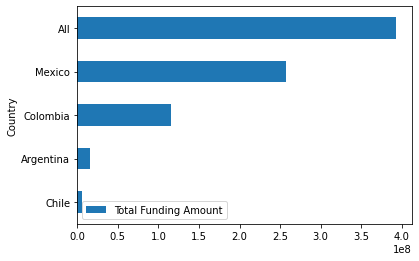

In [302]:
tabla_latam.sort_values(["Total Funding Amount"]).plot(kind="barh")

In [303]:
tabla_latam[4:5] 
tabla_latam_answer1 = tabla_latam[4:5] 

In [304]:
for i in tabla_latam["Total Funding Amount"]:
    print("%f"%i)

15356980.000000
5358727.000000
115240286.000000
256807998.000000
392763991.000000


In [305]:
for i in tabla_latam_answer1["Total Funding Amount"]:
    print("Total Capital invertido LATAM en el ultimo año fue $ {:,}".format(i))

Total Capital invertido LATAM en el ultimo año fue $ 392,763,991.0


## 2 Haga una comparación entre Colombia con cada uno de los otros países. Analice.

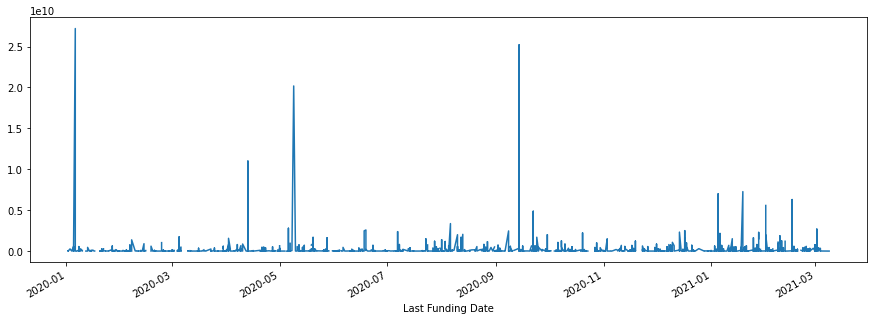

In [306]:
plot_time = df_all[["Last Funding Date", "Total Funding Amount","Country"]].dropna()
plot_time= df_all[df_all["Last Funding Date"]>"2020, 1, 1"]
plot_time.set_index("Last Funding Date", inplace= True)
plot_time['Total Funding Amount'].plot(figsize=(15, 5))

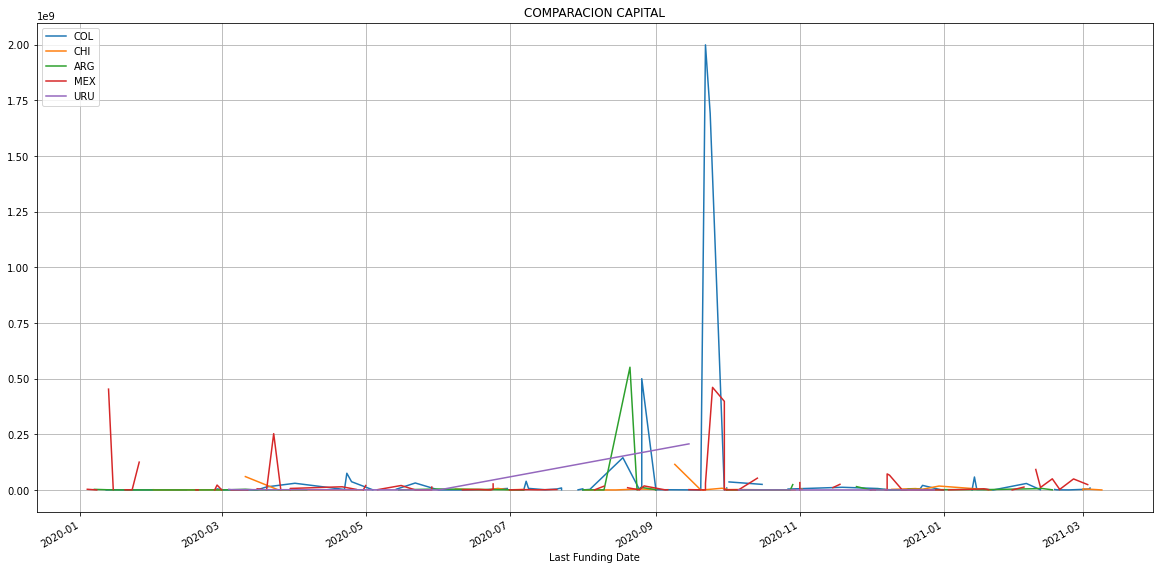

In [307]:
Coloo = plot_time[plot_time.Country == "Colombia"]
Chill = plot_time[plot_time.Country == "Chile"]
Argee = plot_time[plot_time.Country == "Argentina"]
Mexii = plot_time[plot_time.Country == "Mexico"]
Urugg = plot_time[plot_time.Country == "Uruguay"]
 
Coloo['Total Funding Amount'].plot(label="COL",figsize=(20, 10))
Chill['Total Funding Amount'].plot(label="CHI",figsize=(20, 10))
Argee['Total Funding Amount'].plot(label="ARG",figsize=(20, 10))
Mexii['Total Funding Amount'].plot(label="MEX",figsize=(20, 10))
Urugg['Total Funding Amount'].plot(label="URU",figsize=(20, 10))
plt.title("COMPARACION CAPITAL")
plt.legend(loc= "upper left")
plt.grid()
plt.show()

### Podemos ver en la gráfica que al comparar el capital invertido en Colombia con el resto de Latam en los ultimos dos años,  al final del año 2020 estuvimos muy por encima de todos en la region, solo Mexico y Argentina y un poco Uruguay se compararon en algunas fechas, si embargo vemos en el 2021 una caida enorme y nos vemos ya por debajo de Mexico  

## 3 ¿Cuáles son los fondos que más invierten en Colombia? Haga un análisis descriptivo de cada uno de ellos.

In [308]:
df_col["Top 5 Investors"]=  df_col["Top 5 Investors"].dropna()
df_col_sort_by_amount = df_col.pivot_table(index= 'Top 5 Investors',  values= "Total Funding Amount", aggfunc =np.sum )
df_col_sort_by_amount.sort_values(["Total Funding Amount"],ascending= False ).head(5)

,Total Funding Amount
Top 5 Investors,
FCP Emprendimiento e Innovación SP,7.713000e+09
"Wayra, Axon Partners Group",2.131128e+09
"Citadel, United Airlines",2.000000e+09
"SoftBank, Sequoia Capital, FJ Labs, Andreessen Horowitz, FundersClub",1.692005e+09
Wayra,1.687515e+09


### Como podemos ver en el cuadro de arriba, en Colombia los fondos que han invertido capital son FCP Emprendimiento e Innovación SP, Wayra, Axon Partners Group y Citadel, United Airlines   

In [309]:
df_col_sort_by_amount_2020 = df_col[df_col["Last Funding Date"]>"2020, 1, 1"]
df_col_sort_by_amount_2020_21 = df_col_sort_by_amount_2020.pivot_table(index= 'Top 5 Investors',  values= "Total Funding Amount", aggfunc =np.sum )
df_col_sort_by_amount_2020_21.sort_values(["Total Funding Amount"],ascending= False ).head(5)


,Total Funding Amount
Top 5 Investors,
"Citadel, United Airlines",2.000000e+09
"SoftBank, Sequoia Capital, FJ Labs, Andreessen Horowitz, FundersClub",1.692005e+09
Colombia Venture Capital IT,5.000000e+08
"Morgan Stanley, Symbiotics Group, Bancóldex",1.450000e+08
"Greenspring Associates, NFX, Spencer Rascoff, Kaszek Ventures, Acrew Capital",5.817500e+07


### Si lo analizamos desde 2020 hasta hoy podemos ver que Citadel, United Airlines se ha mantenido en el top 5 de los mayores fondeadores en Colombia al igual que SoftBank, Sequoia Capital, FJ Labs, Andreessen Horowitz, FundersClub, recordemos que CITADEL es un fondo de activos con sede en Chicago, Illinois fundado en 1990 por Kenneth C. Griffin.1​ La empresa invierte capital a través de múltiples estrategias. Las principales actividades de Citadel LLC incluyen las llamadas equity y opciones sobre activos. Citadel es la undécima mayor administradora de fondos y de hedge funds en el mundo. 

## TESIS DE INVERSION DE CADA FONDO

## Ya hablamos de Citadel, ahora hablemos de SoftBank 

###  El perfil corporativo de SoftBank incluye otras compañías filiales como la compañía de banda ancha SoftBank BB, el centro de datos en la nube IDC Frontier, la compañía de juegos GungHo Online Entertainment, y la publicitaria SoftBank Creative. Además, cuenta con diversas asociaciones en las filiales japonesas de empresas extranjeras como Yahoo!, E-Trade, Ustream.tv, EF Education First y Morningstar. SBI Group es una compañía japonesa de servicios financieros que nació en 1999 bajo la marca de SoftBank.

## Sequoia Capital

### Sequoia Capital La firma invierte tanto en compañías privadas como públicas. Está especializada en las fases de incubación, semilla, startup, early stage y growth stage 5​.Ha invertido en más de 250 compañías desde 1927, incluyendo Apple, Google, Oracle, PayPal, Stripe, Youtube, Instagram, Yahoo! y WhatsApp 6​. El valor combinado del market value de dichas compañías llega a 1.4 trillones de dólares, el equivalente al 22% de todo Nasdaq 1​. Su portfolio se compone principalmente de servicios financieros, salud, externalización y tecnología. A fecha de 2017 han logrado 68 OPVs y 203 adquisiciones.

## Colombia Venture Capital IT

### Desarrollos hechos en Colombia.Emprendimientos de base tecnológica (aplicada a cualquier sector económico).Ideas de negocio validadas en Mercado a través de KPI’s cumplidos o facturación.Liderados por emprendedores con visión Global.Proyectos escalables.Proyectos con altos niveles de innovación.

## 4 Muestre gráficamente los exits de capital privado en Colombia por deal size.

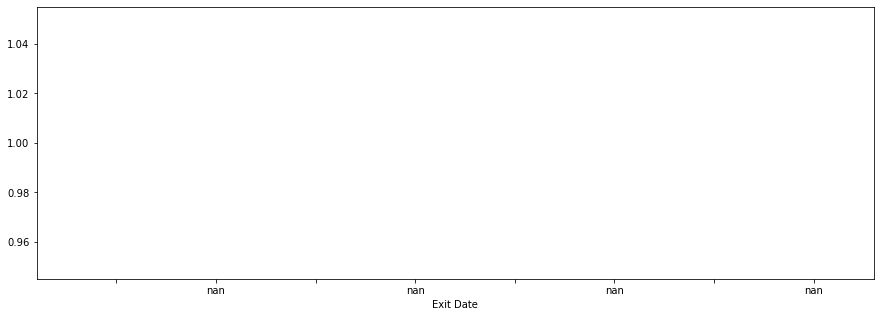

In [310]:
plot_exit = df_col[["Exit Date", "Valuation at IPO","Number of Exits (IPO)"]]
#plot_exit= df_all[df_all["Last Funding Date"]>"2020, 1, 1"]
plot_exit = df_col[df_col["IPO Status"] == "Private"]
plot_exit.set_index("Exit Date", inplace= True)
plot_exit['Number of Exits (IPO)'].plot(figsize=(15, 5))

### Como se puede ver no hay información de Exit ni IPO en Colombia

## 5  Muestre el crecimiento porcentual mensual de ingresos por inversión en Colombia en comparación con los demás países.

In [311]:
rendimiento_diario_all = (df_all["Total Funding Amount"].pct_change())
df_all["rendimiento_diario"] = rendimiento_diario_all
rendimiento_mensual= df_all[["Last Funding Date", "Country", "rendimiento_diario"]].dropna()
rendimiento_mensual= rendimiento_mensual[rendimiento_mensual["Last Funding Date"]>"2015, 1, 1"]
rendimiento_mensual=rendimiento_mensual.set_index("Last Funding Date")
rendimiento_mensual

,Country,rendimiento_diario
Last Funding Date,,
2021-03-04,Colombia,-0.853202
2021-01-19,Colombia,-0.754098
2021-03-04,Colombia,1.414286
2021-02-05,Colombia,4.738246
2021-02-17,Colombia,-0.927646
...,...,...
2020-09-11,Usa,-0.201791
2020-11-18,Usa,-0.048109
2020-10-22,Usa,-0.601351


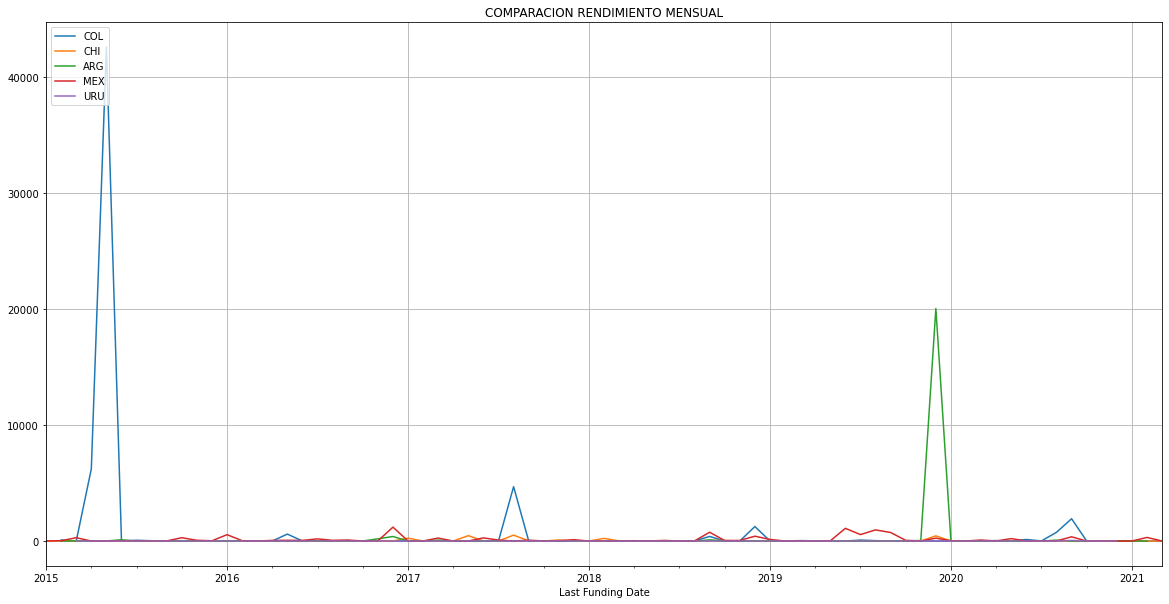

In [312]:
Coloo_rend = rendimiento_mensual[rendimiento_mensual.Country == "Colombia"]
Coloo_rend=Coloo_rend.resample(rule= "M").sum()
Chill_rend = rendimiento_mensual[rendimiento_mensual.Country == "Chile"]
Chill_rend=Chill_rend.resample(rule= "M").sum()
Argee_rend = rendimiento_mensual[rendimiento_mensual.Country == "Argentina"]
Argee_rend=Argee_rend.resample(rule= "M").sum()
Mexii_rend = rendimiento_mensual[rendimiento_mensual.Country == "Mexico"]
Mexii_rend=Mexii_rend.resample(rule= "M").sum()
Urugg_rend = rendimiento_mensual[rendimiento_mensual.Country == "Uruguay"]
Urugg_rend=Urugg_rend.resample(rule= "M").sum()
 
Coloo_rend['rendimiento_diario'].plot(label="COL",figsize=(20, 10))
Chill_rend['rendimiento_diario'].plot(label="CHI",figsize=(20, 10))
Argee_rend['rendimiento_diario'].plot(label="ARG",figsize=(20, 10))
Mexii_rend['rendimiento_diario'].plot(label="MEX",figsize=(20, 10))
Urugg_rend['rendimiento_diario'].plot(label="URU",figsize=(20, 10))
plt.title("COMPARACION RENDIMIENTO MENSUAL")
plt.legend(loc= "upper left")
plt.grid()
plt.show()

### Podemos ver en la gráfica de arriba que el crecimiento porcentual mensual de ingresos por inversión de Colombia a inicios del 2015 fue muy superior del resto de paises de LATAM, luego se nivela el crecimiento porcentual mensual de ingresos por inversión hasta finales de 2017 donde Colombia repunta otro poco, a finales de 2020 Chile sobresale un poco y Mexico es el pais que se destaca por encima de los demas.
### Finalmente en 2021 Colombia tiene un pequeño pico que se destaca de los otros positivamente

## 6 ¿De acuerdo con los hallazgos, qué le hace falta a Colombia para lograr más inversión?

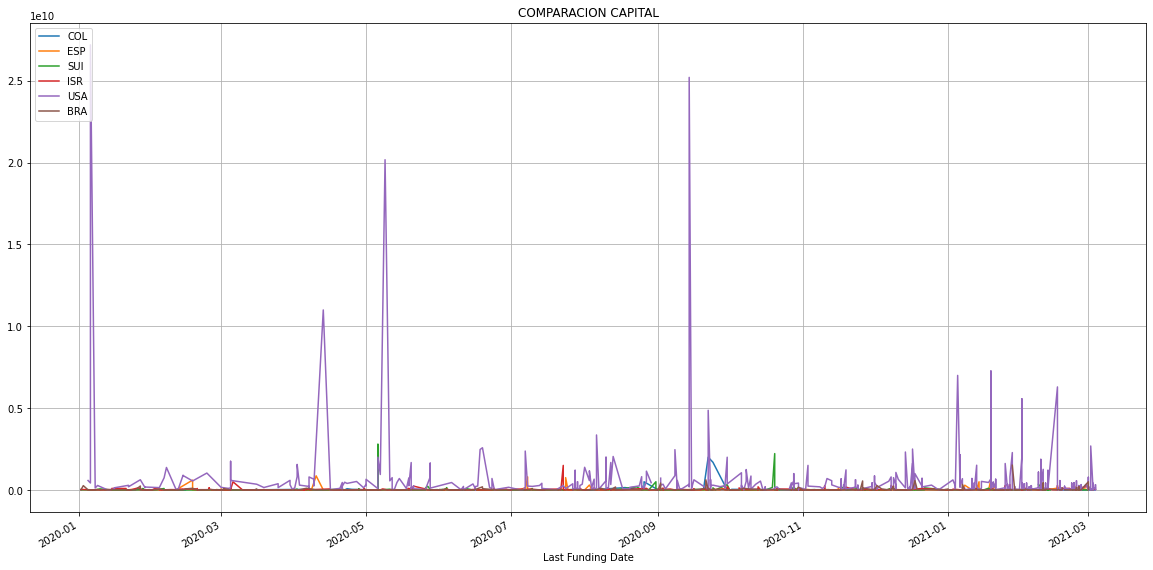

In [313]:
Coloo = plot_time[plot_time.Country == "Colombia"]
Espaa = plot_time[plot_time.Country == "Spain"]
Suiii = plot_time[plot_time.Country == "Switzerland"]
Isrrr = plot_time[plot_time.Country == "Israel"]
Usaaa = plot_time[plot_time.Country == "Usa"]
Braaa = plot_time[plot_time.Country == "Brazil"] 
    
Coloo['Total Funding Amount'].plot(label="COL",figsize=(20, 10))
Espaa['Total Funding Amount'].plot(label="ESP",figsize=(20, 10))
Suiii['Total Funding Amount'].plot(label="SUI",figsize=(20, 10))
Isrrr['Total Funding Amount'].plot(label="ISR",figsize=(20, 10))
Usaaa['Total Funding Amount'].plot(label="USA",figsize=(20, 10))
Braaa['Total Funding Amount'].plot(label="BRA",figsize=(20, 10))
plt.title("COMPARACION CAPITAL")
plt.legend(loc= "upper left")
plt.grid()
plt.show()


### Como hemos podido ver Colombia en comparación con LATAM está bien, sobresale en inversión en los ultimos años, en capital invertido y en crecimientos porcentuales, sin embargo como observams arriba si ya lo comparamos fuera de la región, paises como Estados unidos, España y Suiza están muy por encima y con una permanencia en el tiempo, sobre todo con  Estados unidos no hay comparación, para mejorar esto se debe hacer lo que estos paises hacen como mayor inversión en educación, mayor inversión en nuevas tecnologias, en programas que fomenten la investigación y las patentes.

# II. Con la unión de las bases de datos, luego de etiquetar con 1 para coincidencias y 0 en caso contrario:

## 1 Construir el data warehouse

In [314]:
def Cotejar(data, values):
    if data in values:
        return 1
    else:
        return 0
    
df_col['cotejar_Or'] = df_col['Organization Name'].apply(Cotejar, values=df_contactos['Name'].tolist())
df_col['cotejar_1'] = df_col_top100["isInTop100"]
df_col_merge1 = pd.merge(df_contactos, df_startup, left_on="Name", right_on= "Startup"  )  
df_col['cotejar_all3'] =  df_col['Organization Name'].apply(Cotejar, values=df_col_merge1['Name'].tolist()) 
len(df_col[df_col['cotejar_all3']==1])

9

In [315]:
df_col.head(3)

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date,...,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),School Method,Country,cotejar_Or,cotejar_1,cotejar_all3,City,Region
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,"1,457",Latin America,$1M to $10M,Active,2017-04-01,...,NaN,NaN,NaN,NaN,Colombia,1,1,1,Medellín,Antioquia
1,Elenas,https://www.crunchbase.com/organization/elenas,"Beauty, Cosmetics, Direct Sales, E-Commerce","Bogotá, Distrito Especial, Colombia",Elenas is a Latin American social commerce pla...,"2,462",Latin America,NaN,Active,2018-01-01,...,NaN,NaN,NaN,NaN,Colombia,0,0,0,Bogotá,Distrito Especial
2,Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,"Bogotá, Distrito Especial, Colombia",Get what you want giving what you have,"3,109",Latin America,NaN,Active,2019-04-01,...,NaN,NaN,NaN,NaN,Colombia,1,0,0,Bogotá,Distrito Especial


## 2 Validar gráficamente y eliminar aquellas variables que no afectan la variable de respuesta.

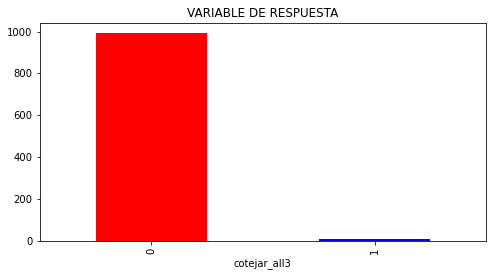

0    991
1      9
Name: cotejar_all3, dtype: int64
Numeros de 1 en la data = 9
Numeros de 0 en la data = 991
0.8999999999999999%
99.1%

In [316]:
plt.figure(figsize = (8,4))
df_col.groupby("cotejar_all3").Region.count().plot.bar(ylim=0, color= ["red", "blue"])
plt.title("VARIABLE DE RESPUESTA")
plt.show()
print(pd.value_counts(df_col.cotejar_all3))
print("Numeros de 1 en la data = %i"%len(df_col[df_col.cotejar_all3==1]))
print("Numeros de 0 en la data = %i"%len(df_col[df_col.cotejar_all3==0]))
print((len(df_col[df_col.cotejar_all3==1])/len(df_col.cotejar_all3))*100, end="%")
print("")
print((len(df_col[df_col.cotejar_all3==0])/len(df_col.cotejar_all3))*100, end="%")

### Como podemos ver se debe hacer un balanceo de la data ya que la mayoria tienen la variable de respuesta 0

###  Antes de hacer el balanceo vamos a ver gráficamente las variables que tengan mas incidencia en las variable de respuesta "cotejar.all3"

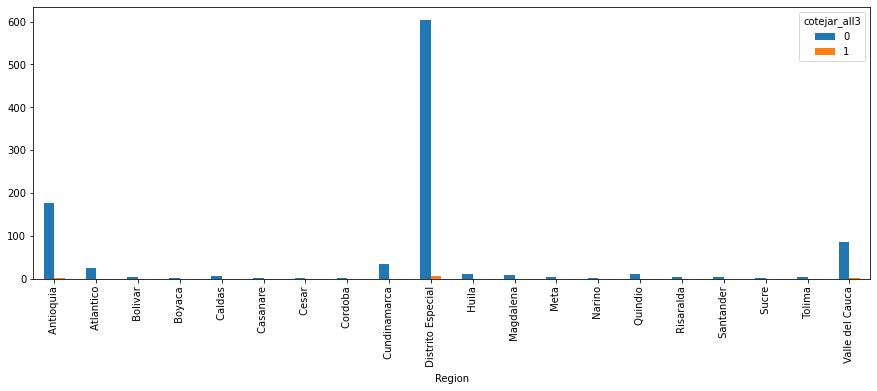

In [317]:
pd.crosstab(df_col.Region,df_col["cotejar_all3"]).plot(kind='bar',figsize = (15,5))

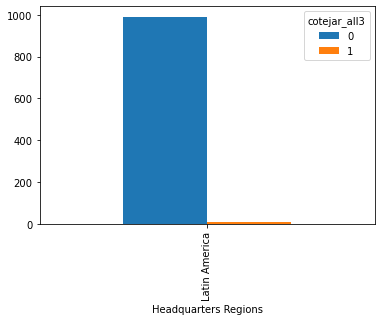

In [318]:
pd.crosstab(df_col["Headquarters Regions"],df_col.cotejar_all3).plot(kind='bar')

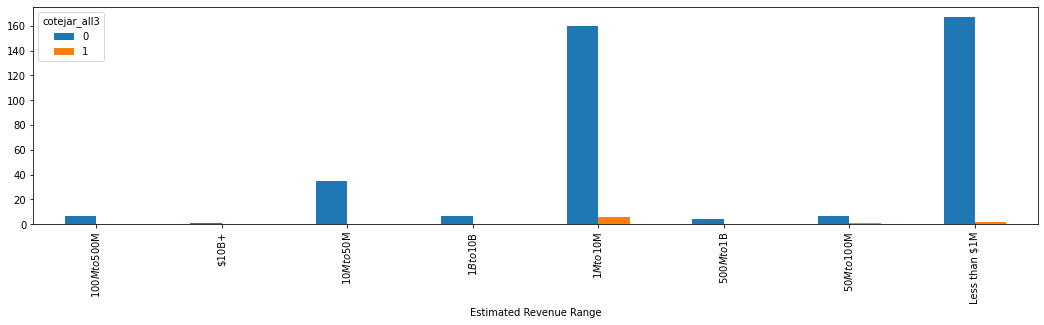

In [319]:
pd.crosstab(df_col["Estimated Revenue Range"],df_col.cotejar_all3).plot(kind='bar', figsize = (18,4))

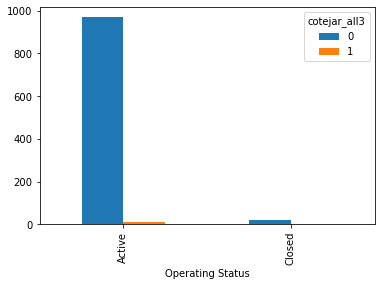

In [320]:
pd.crosstab(df_col["Operating Status"],df_col.cotejar_all3).plot(kind='bar')

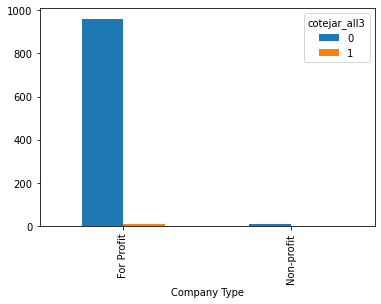

In [321]:
pd.crosstab(df_col["Company Type"],df_col.cotejar_all3).plot(kind='bar')

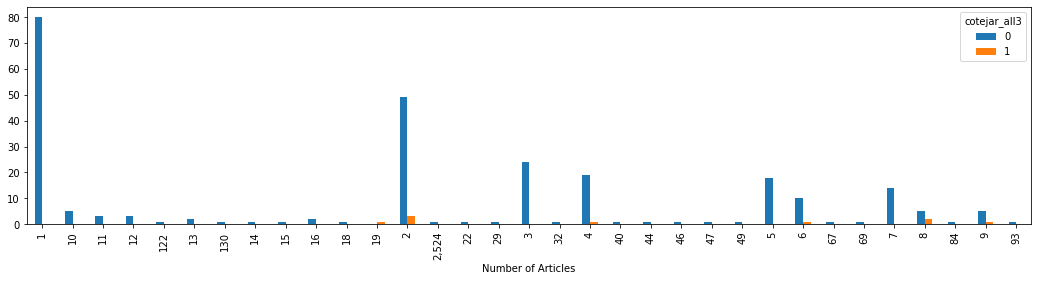

In [322]:
pd.crosstab(df_col["Number of Articles"],df_col.cotejar_all3).plot(kind='bar', figsize = (18,4))

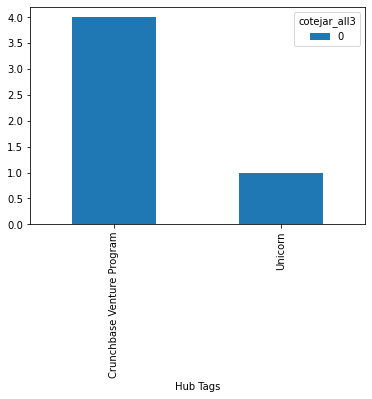

In [323]:
pd.crosstab(df_col["Hub Tags"],df_col.cotejar_all3).plot(kind='bar')

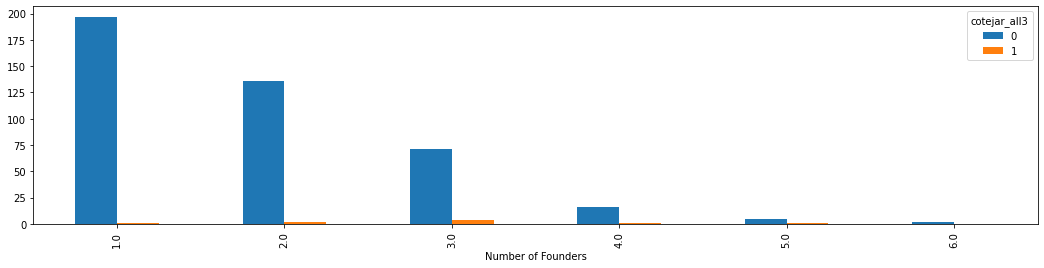

In [324]:
pd.crosstab(df_col["Number of Founders"],df_col.cotejar_all3).plot(kind='bar', figsize = (18,4))

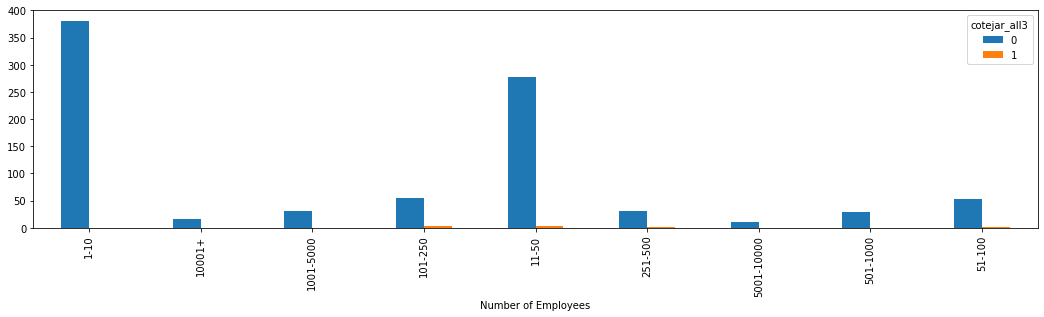

In [325]:
pd.crosstab(df_col["Number of Employees"],df_col.cotejar_all3).plot(kind='bar', figsize = (18,4))

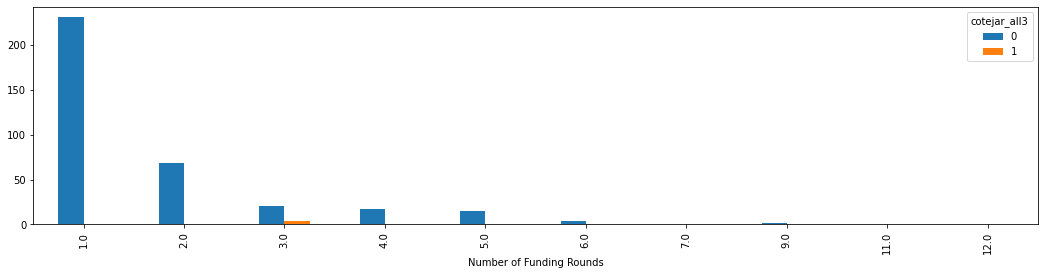

In [326]:
pd.crosstab(df_col["Number of Funding Rounds"],df_col.cotejar_all3).plot(kind='bar', figsize = (18,4))

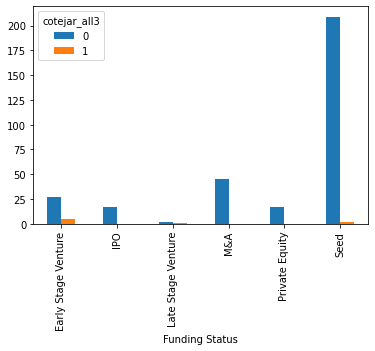

In [327]:
pd.crosstab(df_col["Funding Status"],df_col.cotejar_all3).plot(kind='bar')

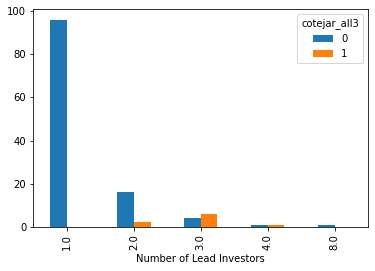

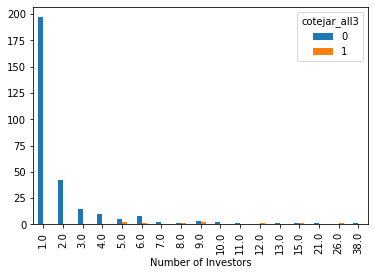

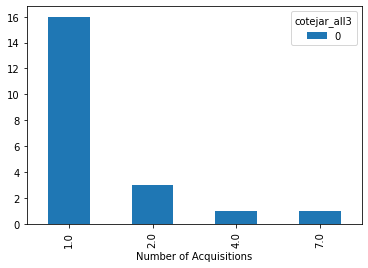

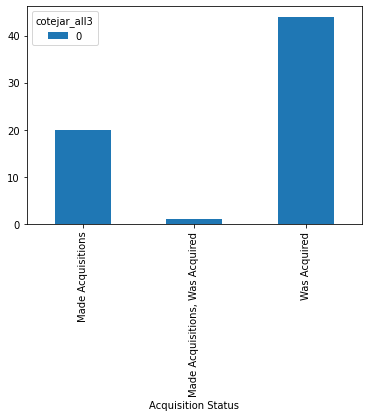

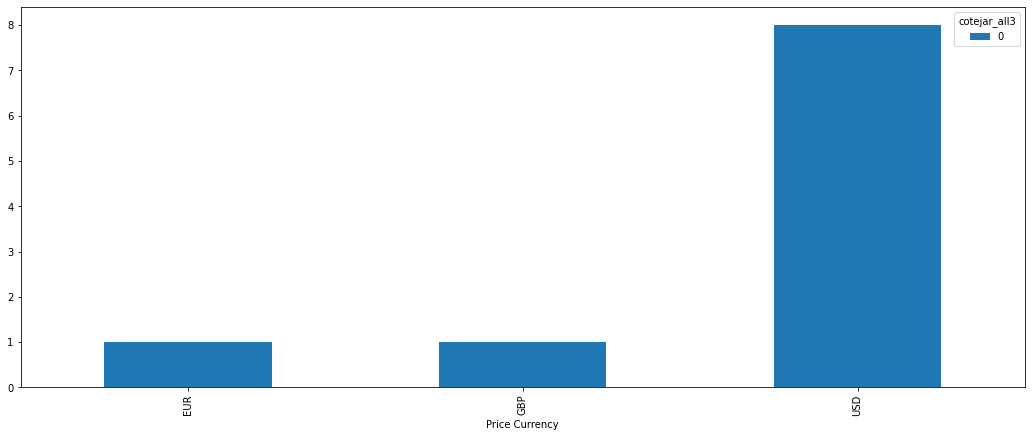

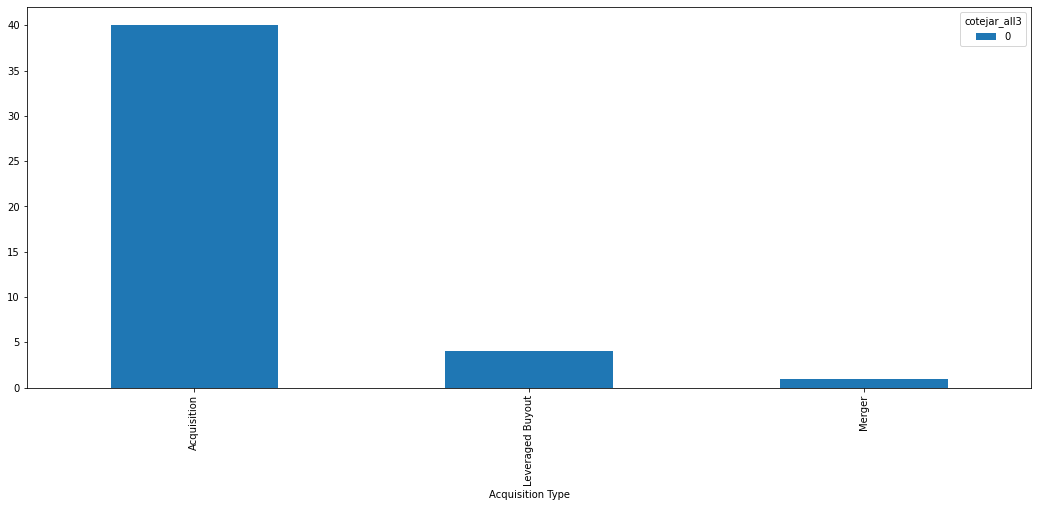

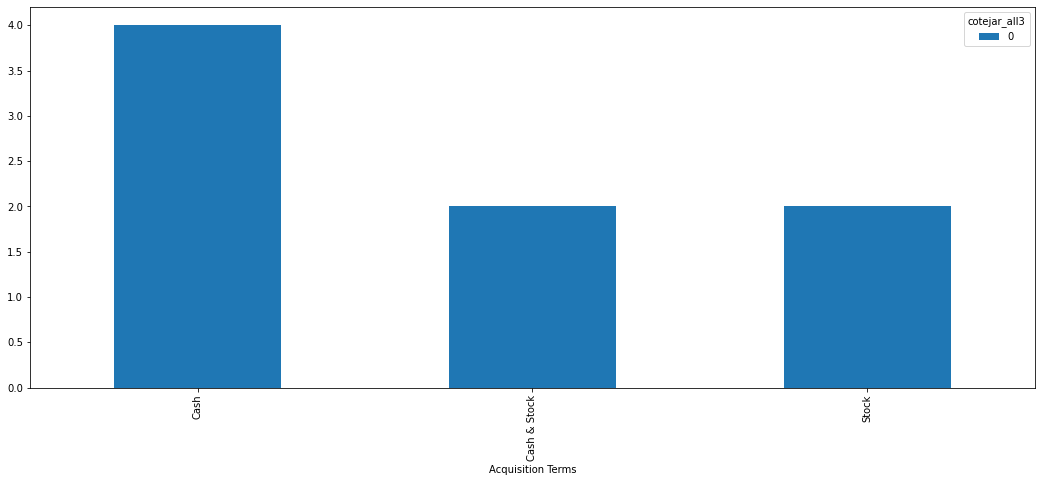

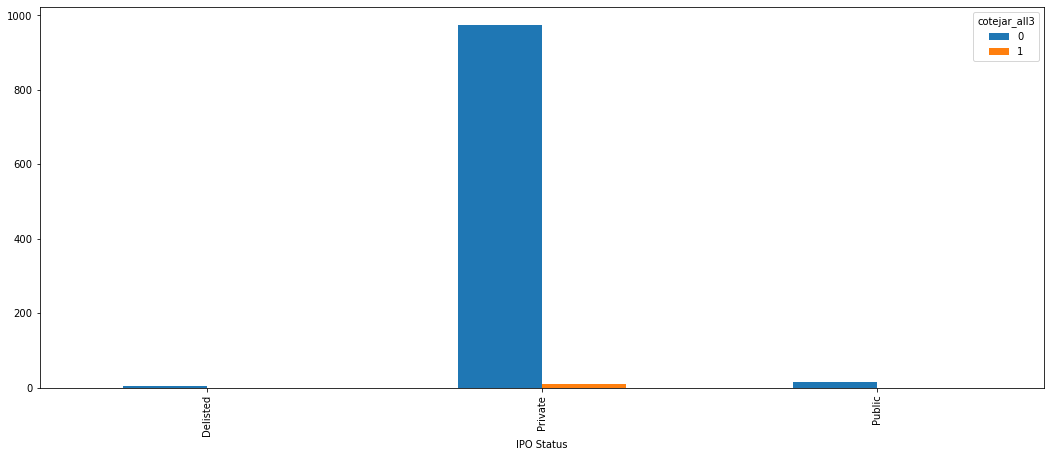

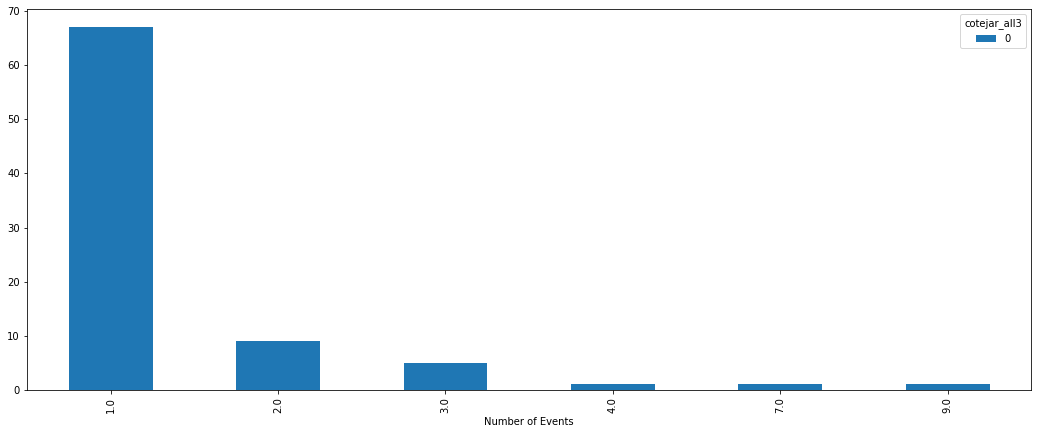

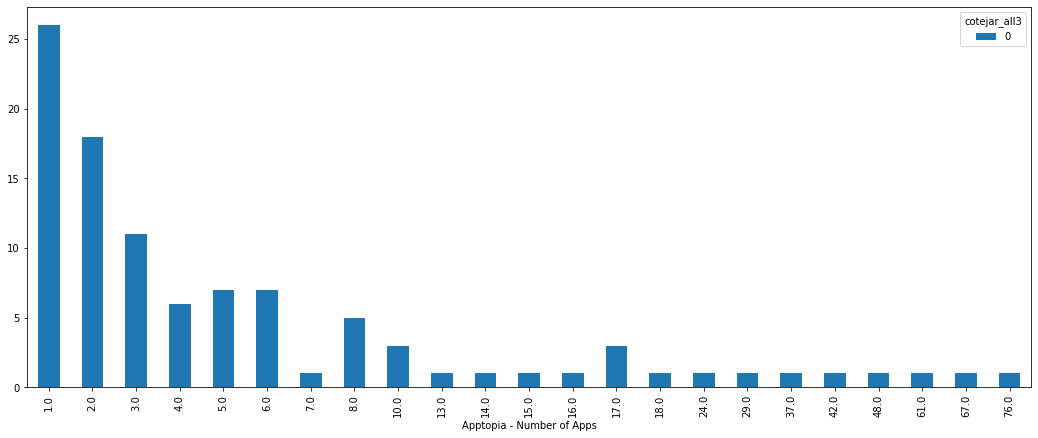

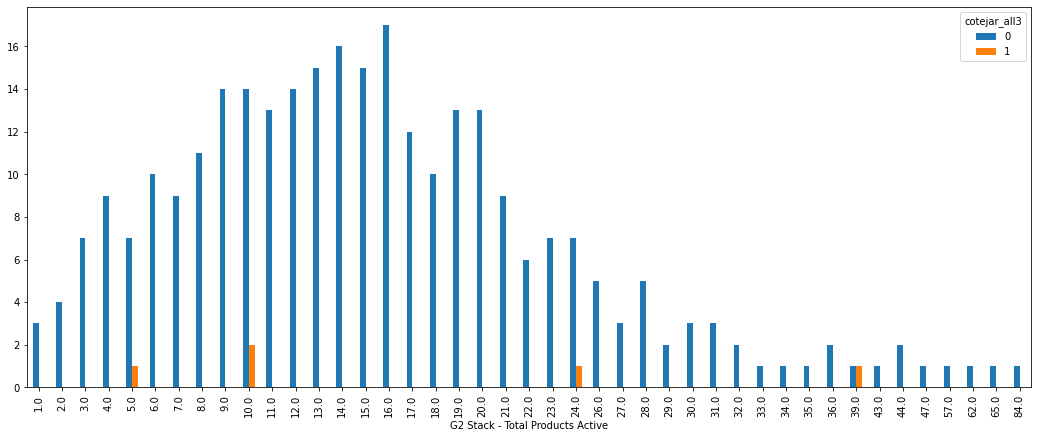

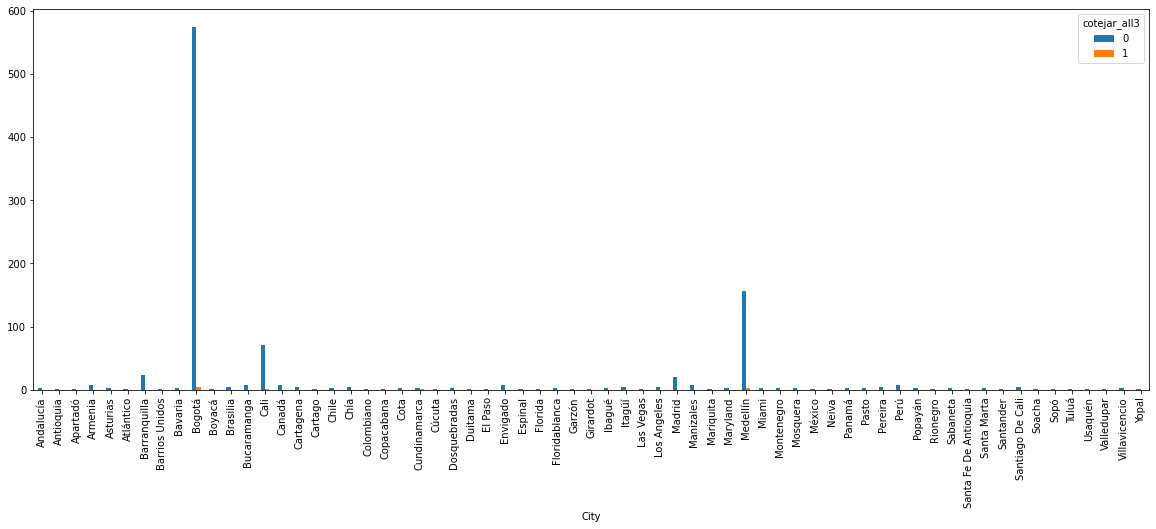

In [328]:
pd.crosstab(df_col["Number of Lead Investors"],df_col.cotejar_all3).plot(kind='bar')
pd.crosstab(df_col["Number of Investors"],df_col.cotejar_all3).plot(kind='bar')
pd.crosstab(df_col["Number of Acquisitions"],df_col.cotejar_all3).plot(kind='bar')
pd.crosstab(df_col["Acquisition Status"],df_col.cotejar_all3).plot(kind='bar')
pd.crosstab(df_col["Price Currency"],df_col.cotejar_all3).plot(kind='bar', figsize= (18,7))
pd.crosstab(df_col["Acquisition Type"],df_col.cotejar_all3).plot(kind='bar', figsize= (18,7))
pd.crosstab(df_col["Acquisition Terms"],df_col.cotejar_all3).plot(kind='bar', figsize= (18,7))
pd.crosstab(df_col["IPO Status"],df_col.cotejar_all3).plot(kind='bar', figsize= (18,7))
pd.crosstab(df_col["Number of Events"],df_col.cotejar_all3).plot(kind='bar', figsize= (18,7))
pd.crosstab(df_col["Apptopia - Number of Apps"],df_col.cotejar_all3).plot(kind='bar', figsize= (18,7))
pd.crosstab(df_col["G2 Stack - Total Products Active"],df_col.cotejar_all3).plot(kind='bar', figsize= (18,7))
pd.crosstab(df_col["City"],df_col.cotejar_all3).plot(kind='bar', figsize= (20,7))



### Variables que nos muestran incidencia en el "y"
#### Region
#### Estimated Revenue Range
#### Operating Status
#### Company Type
#### Number of Articles
#### Number of Founders
#### Number of Employees
#### Number of Funding Rounds
#### Funding Status
#### Number of Lead Investors 
#### Number of Investors
#### IPO Status
#### G2 Stack - Total Products Active
#### City



In [329]:
df_var_inciden = df_col[["Organization Name", "City","Region","Total Funding Amount","Estimated Revenue Range", "Operating Status","Company Type","Number of Articles", "Number of Founders", "Number of Employees","Number of Funding Rounds","Funding Status", "Number of Lead Investors", "Number of Investors", "IPO Status", "G2 Stack - Total Products Active","cotejar_all3"  ]]
df_var_inciden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Organization Name                 1000 non-null   object 
 1   City                              1000 non-null   object 
 2   Region                            1000 non-null   object 
 3   Total Funding Amount              250 non-null    float64
 4   Estimated Revenue Range           397 non-null    object 
 5   Operating Status                  1000 non-null   object 
 6   Company Type                      980 non-null    object 
 7   Number of Articles                266 non-null    object 
 8   Number of Founders                436 non-null    float64
 9   Number of Employees               893 non-null    object 
 10  Number of Funding Rounds          367 non-null    float64
 11  Funding Status                    325 non-null    object 
 12  Number 

In [330]:
for i in df_var_inciden:
    if df_var_inciden[i].isnull().sum()>= len(df_var_inciden[i])*0.3 :
        print( "yes %s"%i)
    else:
        print("no %s"%i)
        

no Organization Name
no City
no Region
yes Total Funding Amount
yes Estimated Revenue Range
no Operating Status
no Company Type
yes Number of Articles
yes Number of Founders
no Number of Employees
yes Number of Funding Rounds
yes Funding Status
yes Number of Lead Investors
yes Number of Investors
no IPO Status
yes G2 Stack - Total Products Active
no cotejar_all3


In [331]:
def dropi (data):
    for i in data:
        if data[i].isnull().sum()>= len(data[i])*0.3 :
            data.drop([i], axis= 1, inplace=True)
    

In [332]:
dropi(df_var_inciden)
df_var_inciden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Organization Name    1000 non-null   object
 1   City                 1000 non-null   object
 2   Region               1000 non-null   object
 3   Operating Status     1000 non-null   object
 4   Company Type         980 non-null    object
 5   Number of Employees  893 non-null    object
 6   IPO Status           1000 non-null   object
 7   cotejar_all3         1000 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


C:\Users\Julian\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [333]:
df_var_inciden = df_var_inciden.dropna()
df_var_inciden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Organization Name    875 non-null    object
 1   City                 875 non-null    object
 2   Region               875 non-null    object
 3   Operating Status     875 non-null    object
 4   Company Type         875 non-null    object
 5   Number of Employees  875 non-null    object
 6   IPO Status           875 non-null    object
 7   cotejar_all3         875 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 61.5+ KB


In [334]:
cols_to_modify = ["City","Region","Operating Status","Company Type","Company Type","IPO Status","Number of Employees"]
cols_to_keep = list(set(df_var_inciden.columns.values).difference(cols_to_modify))
cols_to_keep

['cotejar_all3', 'Organization Name']

In [335]:
df_col_new= pd.get_dummies(df_var_inciden, columns= cols_to_modify)
print(df_col_new.shape)
print(df_col_new.info())


(875, 96)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 0 to 999
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Organization Name               875 non-null    object
 1   cotejar_all3                    875 non-null    int64 
 2   City_Andalucía                  875 non-null    uint8 
 3   City_Antioquia                  875 non-null    uint8 
 4   City_Apartadó                   875 non-null    uint8 
 5   City_Armenia                    875 non-null    uint8 
 6   City_Asturias                   875 non-null    uint8 
 7   City_Atlántico                  875 non-null    uint8 
 8   City_Barranquilla               875 non-null    uint8 
 9   City_Barrios Unidos             875 non-null    uint8 
 10  City_Bavaria                    875 non-null    uint8 
 11  City_Bogotá                     875 non-null    uint8 
 12  City_Boyacá                     875 non-

In [337]:
correlations = df_col_new.corr()["cotejar_all3"].sort_values()
correlations

Number of Employees_1-10        -0.088286
Number of Employees_1001-5000   -0.019209
Number of Employees_501-1000    -0.018535
Region_ Cundinamarca            -0.017840
Region_ Atlantico               -0.015592
                                   ...   
Number of Employees_251-500      0.040483
Number of Employees_51-100       0.067998
Number of Employees_101-250      0.113609
City_Cundinamarca                0.161006
cotejar_all3                     1.000000
Name: cotejar_all3, Length: 95, dtype: float64

In [347]:
print("Most positive correlations : \n\n",correlations.tail(10)*100 )
print("Most negative correlations : \n\n",correlations.head(3)*100 )

Most positive correlations : 

 Company Type_For Profit          1.039261
Operating Status_Active          1.346352
IPO Status_Private               1.434971
City_Cali                        1.542490
City_Medellín                    1.620978
Number of Employees_251-500      4.048267
Number of Employees_51-100       6.799836
Number of Employees_101-250     11.360858
City_Cundinamarca               16.100623
cotejar_all3                   100.000000
Name: cotejar_all3, dtype: float64
Most negative correlations : 

 Number of Employees_1-10        -8.828622
Number of Employees_1001-5000   -1.920855
Number of Employees_501-1000    -1.853530
Name: cotejar_all3, dtype: float64


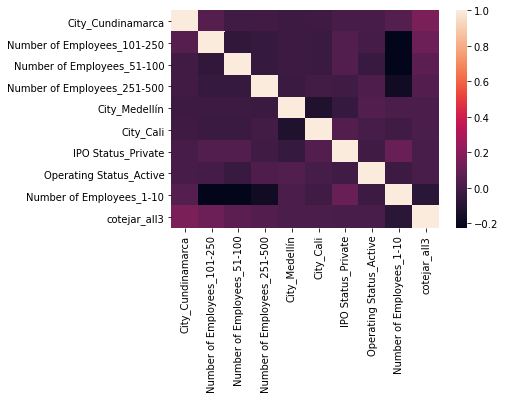

In [348]:
df_col_new= df_col_new[["City_Cundinamarca", "Number of Employees_101-250","Number of Employees_51-100","Number of Employees_251-500","City_Medellín","City_Cali","IPO Status_Private","Operating Status_Active","Number of Employees_1-10","cotejar_all3"]]
sns.heatmap(df_col_new.corr())

In [350]:
X =  df_col_new[["City_Cundinamarca", "Number of Employees_101-250","Number of Employees_51-100","Number of Employees_251-500","City_Medellín","City_Cali","IPO Status_Private","Operating Status_Active","Number of Employees_1-10"]]
# TARGET 
y= df_col_new["cotejar_all3"]

print(X.shape)
print(y.shape)


(875, 9)
(875,)


In [354]:
from pandas_profiling import ProfileReport
ProfileReport(df_col_new)

### Hgamos la regresion logistica

In [355]:

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [357]:
df_col_new.describe()

,City_Cundinamarca,Number of Employees_101-250,Number of Employees_51-100,Number of Employees_251-500,City_Medellín,City_Cali,IPO Status_Private,Operating Status_Active,Number of Employees_1-10,cotejar_all3
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,0.004571,0.062857,0.061714,0.036571,0.163429,0.072000,0.980571,0.982857,0.428571,0.010286
std,0.067496,0.242845,0.240774,0.187814,0.369968,0.258636,0.138105,0.129878,0.495155,0.100953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [378]:
model = linear_model.LogisticRegression()
model.fit(X,y)
predictions = model.predict(X)
print(model.score(X,y))


0.9897142857142858


In [372]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.988571 (0.017843)


C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [381]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions)) # las que estan por fuera de la diagonal son las que hizo mal 
print(classification_report(Y_validation, predictions)) # soporte las validaciones, recall el % de acierto 

0.9942857142857143
[[174   0]
 [  1   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       174
           1       0.00      0.00      0.00         1

    accuracy                           0.99       175
   macro avg       0.50      0.50      0.50       175
weighted avg       0.99      0.99      0.99       175



C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Como podemos observar en la matriz de confusion el score es grande porque en su mayoria predijo los 0 , pero no predijo un solo 1
## Para esto debemos balancear la data
